In [297]:
import pickle
import numpy as np

In [298]:
X = pickle.load(open('X.pkl', 'rb'))
Y = pickle.load(open('Y.pkl', 'rb'))

In [299]:
Y = Y.reshape(len(Y),1)
X=X/255.0

In [300]:
X.shape

(20000, 60, 60, 3)

In [301]:
Y.shape

(20000, 1)

In [302]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [303]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu',input_shape = X.shape[1:]))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(64, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

In [304]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [306]:
from sklearn.model_selection import train_test_split

In [308]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [309]:
history = model.fit(
    X_train_val, y_train_val,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5824 - loss: 0.6692 - val_accuracy: 0.7113 - val_loss: 0.5715
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7103 - loss: 0.5590 - val_accuracy: 0.7325 - val_loss: 0.5233
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7743 - loss: 0.4773 - val_accuracy: 0.7753 - val_loss: 0.4791
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7971 - loss: 0.4375 - val_accuracy: 0.7791 - val_loss: 0.4637
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8191 - loss: 0.4000 - val_accuracy: 0.7819 - val_loss: 0.4696
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8457 - loss: 0.3505 - val_accuracy: 0.7900 - val_loss: 0.4648
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8635 - loss: 0.3071 - val_accuracy: 0.7603 - val_loss: 0.5117
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8909 - loss: 0.2626 - val_accu

In [310]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7639 - loss: 0.7461
Test Loss: 0.720805287361145
Test Accuracy: 0.7760000228881836


In [294]:
import time

time.time()

1732484945.703094

In [295]:
type(1581428129.5990093)

float

In [332]:

import random
import matplotlib.pyplot as plt 

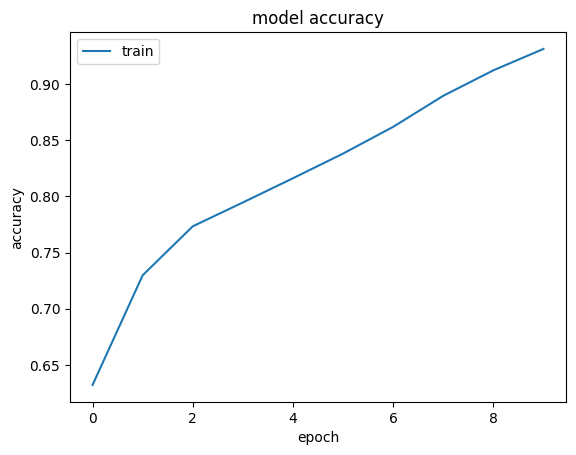

In [333]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

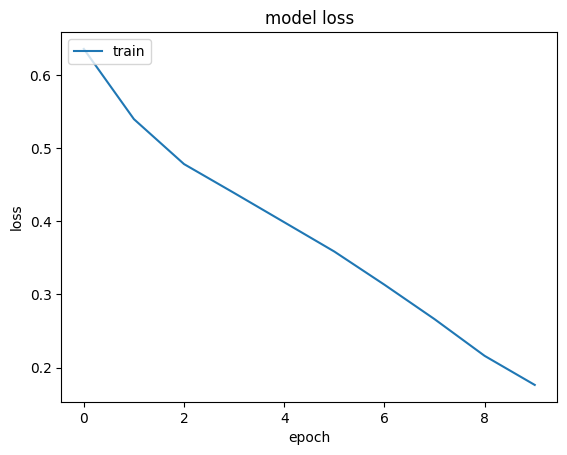

In [334]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [335]:
model.save("Training_model.keras")

In [336]:
pickle.dump(X_test, open('X_test.pkl','wb'))
pickle.dump(y_test, open('Y_test.pkl','wb'))

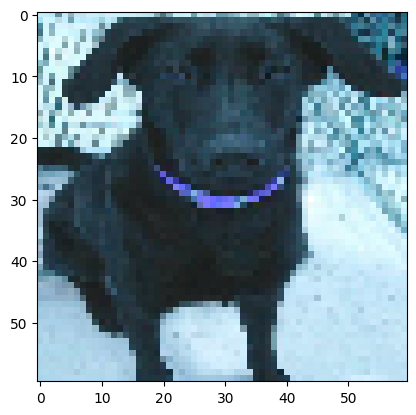

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
this is the picture of a :  cat


In [329]:
idx2=random.randint(0,len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

Y_pred =model.predict(X_test[idx2, :].reshape(1,60,60,3))
Y_pred = Y_pred > 0.5

if(Y_pred==0):
    pred='cat'
else:
    pred = 'dog'
print("this is the picture of a : ",pred)